In [1]:
# Imports
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar ao banco
conn = sqlite3.connect('../database/vendas.db')


In [2]:
# Ler dados
df = pd.read_sql_query("SELECT * FROM vendas", conn)

# Converter coluna de data
df['data'] = pd.to_datetime(df['data'])

df.head()



,data,produto,categoria,preco,quantidade
0,2025-01-20,Mouse,Eletrônicos,99.9,4
1,2025-01-11,Relógio,Acessórios,299.9,4
2,2025-01-14,Fone de Ouvido,Eletrônicos,149.9,2
3,2025-01-01,Mouse,Eletrônicos,99.9,3
4,2025-01-14,Smartphone,Eletrônicos,2500.0,2


In [3]:
# Vendas totais por produto
vendas_por_produto = df.groupby('produto')['preco'].sum().sort_values(ascending=False)

# Vendas por categoria
vendas_categoria = df.groupby('categoria')['preco'].sum()

# Vendas por dia
vendas_por_dia = df.groupby('data')['preco'].sum()


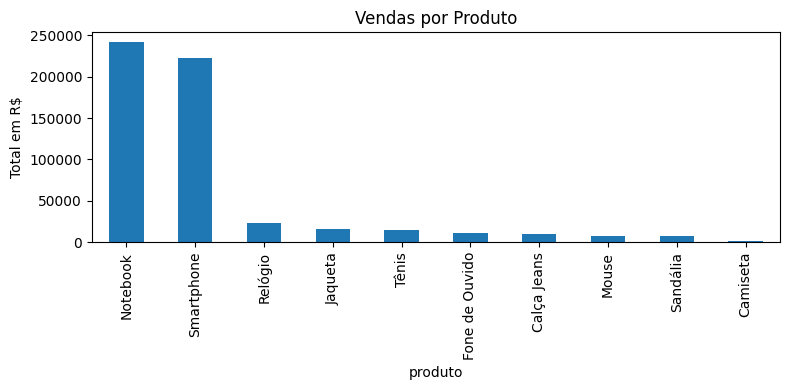

In [4]:
# Plot 1: Produtos mais vendidos
plt.figure(figsize=(8,4))
vendas_por_produto.plot(kind='bar', title='Vendas por Produto')
plt.ylabel('Total em R$')
plt.tight_layout()
plt.show()

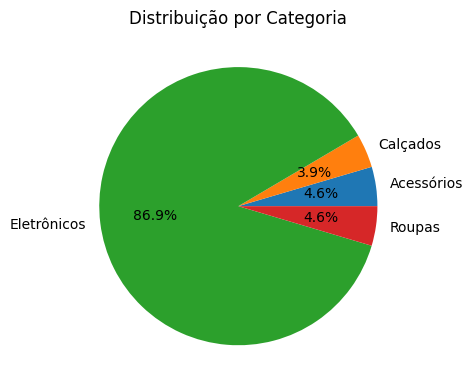

In [5]:
# Plot 2: Vendas por categoria
plt.figure(figsize=(6,4))
vendas_categoria.plot(kind='pie', autopct='%1.1f%%', title='Distribuição por Categoria')
plt.ylabel('')
plt.tight_layout()
plt.show()

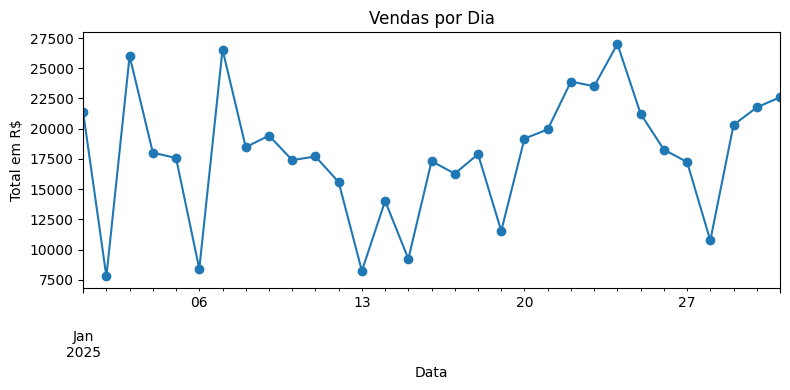

In [6]:
# Plot 3: Vendas por dia
plt.figure(figsize=(8,4))
vendas_por_dia.plot(marker='o', title='Vendas por Dia')
plt.ylabel('Total em R$')
plt.xlabel('Data')
plt.tight_layout()